# Observations

* Presence of minimal outliers between Capomulin, Ramicane, Infubinol, and Ceftamin illustrates reliable data. 
* Tumor volumes for Capomulin regimens increase over time with heavier mouse s185; however, decrease over time in the lighter mouse, r157. The scatter plots illustrates mice 20(g) and under appear to reflect the least amount tumor growth over time. 
* Ramicane appears to be the most successful regimen in treating tumors, with Capomulin following closely behind in second place. 

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress

In [2]:
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

In [3]:
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

In [4]:
mouse_metadata.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [5]:
study_results.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
results_merge_df = pd.merge(mouse_metadata, study_results, on="Mouse ID", how="outer")
results_merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [7]:
results_merge_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1893 entries, 0 to 1892
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Mouse ID            1893 non-null   object 
 1   Drug Regimen        1893 non-null   object 
 2   Sex                 1893 non-null   object 
 3   Age_months          1893 non-null   int64  
 4   Weight (g)          1893 non-null   int64  
 5   Timepoint           1893 non-null   int64  
 6   Tumor Volume (mm3)  1893 non-null   float64
 7   Metastatic Sites    1893 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 133.1+ KB


In [8]:
mouse_count = results_merge_df['Mouse ID'].nunique()
mouse_count

249

In [9]:
duplicate_mice = results_merge_df[results_merge_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice.value_counts()

Mouse ID  Drug Regimen  Sex     Age_months  Weight (g)  Timepoint  Tumor Volume (mm3)  Metastatic Sites
g989      Propriva      Female  21          26          0          45.000000           0                   1
                                                        5          47.570392           0                   1
                                                        10         49.880528           0                   1
                                                        15         53.442020           0                   1
                                                        20         54.657650           1                   1
dtype: int64

In [10]:
duplicate_mouse = results_merge_df.loc[results_merge_df['Mouse ID'] == "g989",:]
duplicate_mouse

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [11]:
clean_results_merge_df = results_merge_df.loc[results_merge_df["Mouse ID"] != "g989", :]
clean_results_merge_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [12]:
clean_mouse_count = clean_results_merge_df['Mouse ID'].nunique()
clean_mouse_count

248

In [13]:
#Checking for duplicates, confirmed duplicates have been removed.
duplicate_mice_check = clean_results_merge_df[clean_results_merge_df.duplicated(["Mouse ID", "Timepoint"])]
duplicate_mice_check.value_counts()

Series([], dtype: int64)

In [14]:
drug_regimen_grouped = clean_results_merge_df.groupby(["Drug Regimen"])
drug_regimen_grouped.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0


In [15]:
mean_tumor = drug_regimen_grouped["Tumor Volume (mm3)"].mean()
mean_tumor

Drug Regimen
Capomulin    40.675741
Ceftamin     52.591172
Infubinol    52.884795
Ketapril     55.235638
Naftisol     54.331565
Placebo      54.033581
Propriva     52.320930
Ramicane     40.216745
Stelasyn     54.233149
Zoniferol    53.236507
Name: Tumor Volume (mm3), dtype: float64

In [16]:
median_tumor = drug_regimen_grouped["Tumor Volume (mm3)"].median()
median_tumor

Drug Regimen
Capomulin    41.557809
Ceftamin     51.776157
Infubinol    51.820584
Ketapril     53.698743
Naftisol     52.509285
Placebo      52.288934
Propriva     50.446266
Ramicane     40.673236
Stelasyn     52.431737
Zoniferol    51.818479
Name: Tumor Volume (mm3), dtype: float64

In [17]:
var_tumor = drug_regimen_grouped["Tumor Volume (mm3)"].var()
var_tumor

Drug Regimen
Capomulin    24.947764
Ceftamin     39.290177
Infubinol    43.128684
Ketapril     68.553577
Naftisol     66.173479
Placebo      61.168083
Propriva     43.852013
Ramicane     23.486704
Stelasyn     59.450562
Zoniferol    48.533355
Name: Tumor Volume (mm3), dtype: float64

In [18]:
std_dev_tumor = drug_regimen_grouped["Tumor Volume (mm3)"].std()
std_dev_tumor

Drug Regimen
Capomulin    4.994774
Ceftamin     6.268188
Infubinol    6.567243
Ketapril     8.279709
Naftisol     8.134708
Placebo      7.821003
Propriva     6.622085
Ramicane     4.846308
Stelasyn     7.710419
Zoniferol    6.966589
Name: Tumor Volume (mm3), dtype: float64

In [19]:
std_err_tumor = drug_regimen_grouped["Tumor Volume (mm3)"].sem()
std_err_tumor

Drug Regimen
Capomulin    0.329346
Ceftamin     0.469821
Infubinol    0.492236
Ketapril     0.603860
Naftisol     0.596466
Placebo      0.581331
Propriva     0.544332
Ramicane     0.320955
Stelasyn     0.573111
Zoniferol    0.516398
Name: Tumor Volume (mm3), dtype: float64

In [20]:
tumor_summary = pd.DataFrame({"Mean Tumor Vol": mean_tumor, "Median Tumor Vol": median_tumor, "Tumor Vol Variane": var_tumor, "Tumor Vol Std. Dev": std_dev_tumor, "Tumor Vol Std. Err.": std_err_tumor})
tumor_summary

,Mean Tumor Vol,Median Tumor Vol,Tumor Vol Variane,Tumor Vol Std. Dev,Tumor Vol Std. Err.
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


Text(0, 0.5, 'Number of Mice Tests')

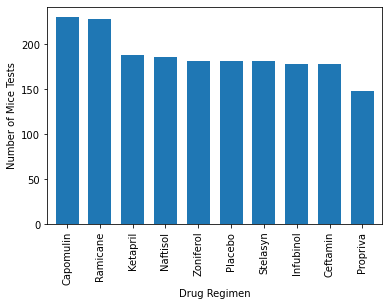

In [21]:
mice_timepoints = clean_results_merge_df['Drug Regimen'].value_counts().plot.bar(width=0.7, zorder=3)
mice_timepoints.set_xlabel("Drug Regimen")
mice_timepoints.set_ylabel("Number of Mice Tests")

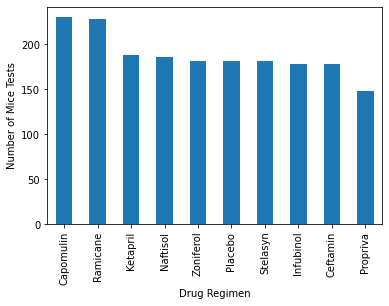

<Figure size 432x288 with 0 Axes>

In [22]:
py_chart = clean_results_merge_df['Drug Regimen'].value_counts().plot(kind='bar', figsize=(6,4))

# Set the xlabel and ylabel using class methods
py_chart.set_xlabel("Drug Regimen")
py_chart.set_ylabel("Number of Mice Tests")



plt.show()
plt.tight_layout()

In [23]:
gender_count = clean_results_merge_df.groupby(['Sex'])
gender_count = gender_count.size()
gender_count


Sex
Female    922
Male      958
dtype: int64

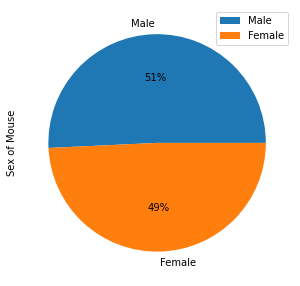

In [24]:
sex_pandas_pie = pd.DataFrame({'Sex of Mouse': [958, 930,]},index = ['Male', 'Female'])
plot = sex_pandas_pie.plot.pie(y='Sex of Mouse',  autopct="%1.f%%", figsize=(5, 5))

([<matplotlib.patches.Wedge at 0x7fb082ee9430>,
 [Text(-0.02562299800632484, -1.099701533132135, 'Female'),
  Text(0.025623100967813093, 1.099701530733132, 'Male')],
 [Text(-0.013976180730722638, -0.5998371998902553, '49%'),
  Text(0.013976236891534414, 0.5998371985817083, '51%')])

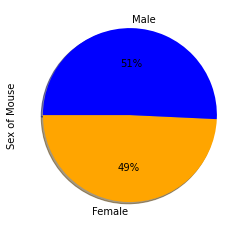

In [25]:
mouse_labels = ["Female", "Male"]
sex_size = [930, 958]
colors = ["orange", "blue"]
plt.ylabel("Sex of Mouse")
plt.pie(sex_size, labels = mouse_labels, colors=colors, autopct="%1.f%%", shadow=True, startangle=180)

In [26]:
greatest_tpoint = pd.DataFrame(clean_results_merge_df.groupby('Mouse ID')['Timepoint'].max().sort_values()).reset_index().rename(columns={'Timepoint': 'max_timepoint'})

last_tpoint_df = pd.merge(clean_results_merge_df, greatest_tpoint, on = "Mouse ID")
last_tpoint_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
0,k403,Ramicane,Male,21,16,0,45.000000,0,45
1,k403,Ramicane,Male,21,16,5,38.825898,0,45
2,k403,Ramicane,Male,21,16,10,35.014271,1,45
3,k403,Ramicane,Male,21,16,15,34.223992,1,45
4,k403,Ramicane,Male,21,16,20,32.997729,1,45


In [27]:
#Capomulin, Ramicane, Infubinol, and Ceftamin

treatment_names = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

volume_of_tumor = []

for drug in treatment_names:
    
    treatment_df = last_tpoint_df.loc[last_tpoint_df['Drug Regimen'] == drug]

    final_vol_df = treatment_df.loc[treatment_df['Timepoint'] ==  treatment_df['max_timepoint']]
    
    
    fin_vol_values = final_vol_df['Tumor Volume (mm3)']
    volume_of_tumor.append(fin_vol_values)
    
    # Calculate and print the interquartile range (IQR) for each regimen
    quart = fin_vol_values.quantile([.25,.5,.75])
    lower_quartiles = quart[0.25]
    upper_quartiles = quart[0.75]
    interquartile = upper_quartiles-lower_quartiles
    print(f'Interquartile for {drug}: {interquartile}')
    
    # Find upper and lower bounds to identify outliers 
    lower_bnd = lower_quartiles - (1.5*interquartile)
    upper_bnd = upper_quartiles + (1.5*interquartile)
    print(f'Lower Bound for {drug}: {lower_bnd}')
    print(f'Upper Bound for {drug}: {upper_bnd}')
    
    # Check for outliers
    outliers = (fin_vol_values.loc[(final_vol_df['Tumor Volume (mm3)'] >= upper_bnd) | 
                                        (final_vol_df['Tumor Volume (mm3)'] <= lower_bnd)]).count()
    print(f'Number of {drug} outliers: {outliers}')


Interquartile for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
Interquartile for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
Interquartile for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
Interquartile for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


In [28]:
treatment_names = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

volume_of_tumor = []

for drug in treatment_names:
    
    treatment_df = last_tpoint_df.loc[last_tpoint_df['Drug Regimen'] == drug]

    # Create  dataframes for final timepoint for each regimen
    final_vol_df = treatment_df.loc[treatment_df['Timepoint'] ==  treatment_df['max_timepoint']]
    
    # Series of all final volume values for each regimen
    values_df = final_vol_df['Tumor Volume (mm3)']
    volume_of_tumor.append(values_df)
    
    # Calc/Print the interquartile range (IQR) for each regimen
    quartiles = values_df.quantile([.25,.5,.75])
    lower_quartiles = quartiles[0.25]
    upper_quartiles = quartiles[0.75]
    interquartiles = upper_quartiles-lower_quartiles
    print(f'IQR for {drug}: {interquartiles}')
    
    # Find upper/ower bounds to identify outliers for each regimen
    lower_bnd = lower_quartiles - (1.5*interquartiles)
    upper_bnd = upper_quartiles + (1.5*interquartiles)
    print(f'Lower Bound for {drug}: {lower_bnd}')
    print(f'Upper Bound for {drug}: {upper_bnd}')
    
    # Check for outliers
    outliers = (values_df.loc[(final_vol_df['Tumor Volume (mm3)'] >= upper_bnd) | 
                                        (final_vol_df['Tumor Volume (mm3)'] <= lower_bnd)]).count()
    print(f'Number of {drug} outliers: {outliers}')


IQR for Capomulin: 7.781863460000004
Lower Bound for Capomulin: 20.70456164999999
Upper Bound for Capomulin: 51.83201549
Number of Capomulin outliers: 0
IQR for Ramicane: 9.098536719999998
Lower Bound for Ramicane: 17.912664470000003
Upper Bound for Ramicane: 54.30681135
Number of Ramicane outliers: 0
IQR for Infubinol: 11.477135160000003
Lower Bound for Infubinol: 36.83290494999999
Upper Bound for Infubinol: 82.74144559000001
Number of Infubinol outliers: 1
IQR for Ceftamin: 15.577752179999997
Lower Bound for Ceftamin: 25.355449580000002
Upper Bound for Ceftamin: 87.66645829999999
Number of Ceftamin outliers: 0


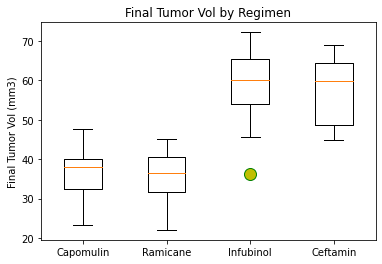

In [29]:
flierprops = dict(marker='o', markerfacecolor='y', markersize=12, markeredgecolor='green')

# Plot boxplot
plt.boxplot(volume_of_tumor, flierprops=flierprops)

# Add title and labels to boxplot
plt.title('Final Tumor Vol by Regimen')
plt.ylabel('Final Tumor Vol (mm3)')
plt.xticks([1, 2, 3, 4], ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin'])

plt.show()

In [30]:
#Iso capo to locate various mouse ID for line plots

last_tpoint_df.loc[last_tpoint_df['Drug Regimen'] == 'Capomulin']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites,max_timepoint
10,s185,Capomulin,Female,3,17,0,45.000000,0,45
11,s185,Capomulin,Female,3,17,5,43.878496,0,45
12,s185,Capomulin,Female,3,17,10,37.614948,0,45
13,s185,Capomulin,Female,3,17,15,38.177232,0,45
14,s185,Capomulin,Female,3,17,20,36.866876,0,45
...,...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1,45
1439,r157,Capomulin,Male,22,25,0,45.000000,0,15
1440,r157,Capomulin,Male,22,25,5,45.597064,0,15
1441,r157,Capomulin,Male,22,25,10,46.059608,0,15


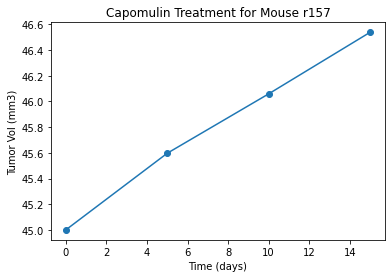

In [31]:
# Capo data points
capo_mouse = clean_results_merge_df.loc[clean_results_merge_df['Mouse ID'] == 'r157']

plt.plot(capo_mouse['Timepoint'], capo_mouse['Tumor Volume (mm3)'], marker = 'o')

# Plot Labels
plt.xlabel("Time (days)")
plt.ylabel("Tumor Vol (mm3)")
plt.title("Capomulin Treatment for Mouse r157")

# Plots
plt.show()

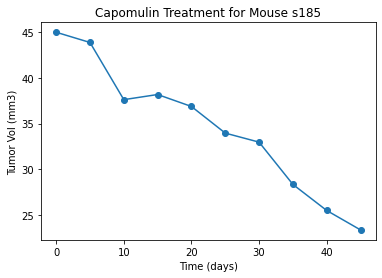

In [34]:
# Capo data points for second mouse to help illustrate observation of weight impact on tumor volume
capo_mouse = clean_results_merge_df.loc[clean_results_merge_df['Mouse ID'] == 's185']

plt.plot(capo_mouse['Timepoint'], capo_mouse['Tumor Volume (mm3)'], marker = 'o')

# Plot Labels
plt.xlabel("Time (days)")
plt.ylabel("Tumor Vol (mm3)")
plt.title("Capomulin Treatment for Mouse s185")

# Plots
plt.show()

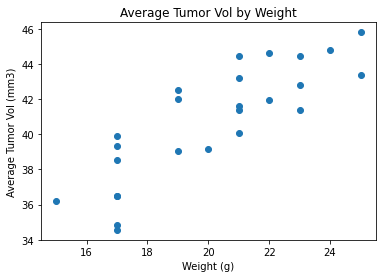

In [32]:
# Isolating Capo
capo_df = clean_results_merge_df.loc[clean_results_merge_df['Drug Regimen'] == 'Capomulin']

# Find average tumor volume for each mouse

avg_volume_df = pd.DataFrame(capo_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})

# Merging avg tumor
avg_volume_df = pd.merge(capo_df, avg_volume_df, on='Mouse ID')
final_avg_volume_df = avg_volume_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_volume_df

x = final_avg_volume_df['Weight (g)']
y = final_avg_volume_df['avg_tumor_vol']

# Scatterplot
plt.scatter(x, y)

# Plot Labels
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Vol (mm3)")
plt.title('Average Tumor Vol by Weight')
# Display plot
plt.show()

The correlation between weight and average tumor volume
on the Capomulin regimen is 0.84.


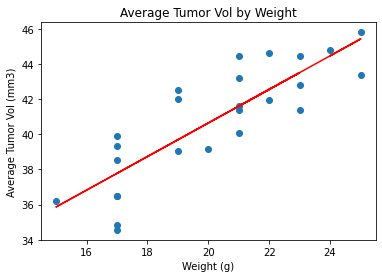

In [33]:
#Linear Regression

capo_df = clean_results_merge_df.loc[clean_results_merge_df['Drug Regimen'] == 'Capomulin']
avg_volume_df = pd.DataFrame(capo_df.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().sort_values()).reset_index().rename(columns={'Tumor Volume (mm3)': 'avg_tumor_vol'})
avg_volume_df = pd.merge(capo_df, avg_volume_df, on='Mouse ID')
final_avg_volume_df = avg_volume_df[['Weight (g)', 'avg_tumor_vol']].drop_duplicates()
final_avg_volume_df
x = final_avg_volume_df['Weight (g)']
y = final_avg_volume_df['avg_tumor_vol']

#Coefficient
correlate = st.pearsonr(x,y)

print(f"""The correlation between weight and average tumor volume
on the Capomulin regimen is {round(correlate[0],2)}.""")

(slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
regression_values = x * slope + intercept

line = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#Lin Regression Plotting
plt.scatter(x,y)
plt.plot(x,regression_values,"r-")

# Labels/Plot Titles
plt.xlabel("Weight (g)")
plt.ylabel("Average Tumor Vol (mm3)")
plt.title('Average Tumor Vol by Weight')
plt.show()